# Importing libraries

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from matplotlib.pyplot import figure

# Connecting to Database

In [104]:
import MySQLdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
myvars = {}
with open("group2-mysql-password") as myfile:
    for line in myfile:
        name, var = line.partition(":")[::2]
        myvars[name.strip()] = var.strip()
import MySQLdb
conn = MySQLdb.connect(host="localhost", user=myvars['DB username'], passwd=myvars['DB password'], db=myvars['DB databasename'])
cursor = conn.cursor()

# Checking for null values in Payroll Report table

In [105]:
cursor.execute('SELECT PR.city, PR.Employee_title, AVG(PR.Hourly_rate), Year(PR.check_date),PR.check_date, CP.AVERAGE FROM Payroll_report as PR INNER JOIN CONSUMER_PRICE_INDEX AS CP ON YEAR(PR.Pay_period_begin_date)=CP.YEAR GROUP by PR.city, PR.Employee_title, Year(PR.check_date)');
rows=cursor.fetchall()
updated_Table_PR=pd.DataFrame(rows, columns = ['City', 'Employee_title', 'Average Hourly_rate', 'Year','Check_date', 'CPI_AVG'])
Null_Check_Pointer=0
               
#Check for null values by iterating through rows from DB
for result in rows:
    if any(field is None for field in result):
        print(result) 
        Null_Check_Pointer +=1
if Null_Check_Pointer==0:
    print("There are no null values in the Payroll Report table")
else:
    updated_Table_PR = updated_Table_PR.fillna('NaN') # replace NaN w 0 

updated_Table_PR.head()

There are no null values in the Payroll Report table


,City,Employee_title,Average Hourly_rate,Year,Check_date,CPI_AVG
0,ALBANY,ACCOUNT CLERK,2098.029989,2012,2012-12-19,730.198
1,ALBANY,ACCOUNT CLERK,2307.696655,2013,2013-12-18,742.469
2,ALBANY,ACCOUNT CLERK,976.929993,2014,2014-12-31,752.288
3,ALBANY,ACCOUNT CLERK,2004.593343,2015,2015-12-30,753.237
4,ALBANY,ACCOUNT CLERK,1559.729980,2016,2016-03-23,761.351


# Checking for null values in Consumer Price Index

In [106]:
cursor.execute('SELECT `YEAR`, `AVERAGE` FROM CONSUMER_PRICE_INDEX');
rows_CPI=cursor.fetchall()
updated_Table_CPI=pd.DataFrame(rows_CPI, columns = ['Year','Average Hourly Rate'])
Null_Check_Pointer_CPI=0
               
#Check for null values by iterating through rows from DB
for result in rows_CPI:
    if any(field is None for field in result):
        print(result) 
        Null_Check_Pointer_CPI +=1
if Null_Check_Pointer_CPI==0:
    print("There are no null values in the Consumer Price Index table")
else:
    updated_Table_CPI = updated_Table_CPI.fillna('NaN') # replace NaN w 0 

updated_Table_CPI.tail()

There are no null values in the Consumer Price Index table


,Year,Average Hourly Rate
26,2017,776.256
27,2018,791.057
28,2019,804.134
29,2020,817.882
30,2021,840.535


In [107]:
#Splitting the data accross each year
cursor.execute('SELECT PR.city, PR.Employee_title, AVG(PR.Hourly_rate),Year(PR.check_date),PR.check_date, CP.AVERAGE FROM Payroll_report AS PR INNER JOIN CONSUMER_PRICE_INDEX AS CP ON YEAR(PR.Pay_period_begin_date)=CP.YEAR and YEAR(PR.Pay_period_begin_date)=2021 GROUP by PR.city, PR.Employee_title,Year(PR.check_date) ORDER  BY AVG(PR.Hourly_rate)')
rows_2021=cursor.fetchall()
updated_Table_PR_2021=pd.DataFrame(rows_2021, columns = ['City', 'Employee_title', 'Average Hourly_rate','Year', 'Check_date', 'CPI_AVG'])


cursor.execute('SELECT PR.city, PR.Employee_title, AVG(PR.Hourly_rate),Year(PR.check_date),PR.check_date, CP.AVERAGE FROM Payroll_report AS PR INNER JOIN CONSUMER_PRICE_INDEX AS CP ON YEAR(PR.Pay_period_begin_date)=CP.YEAR and YEAR(PR.Pay_period_begin_date)=2020 GROUP by PR.city, PR.Employee_title,Year(PR.check_date) ORDER  BY AVG(PR.Hourly_rate)')
rows_2020=cursor.fetchall()
updated_Table_PR_2020=pd.DataFrame(rows_2020, columns = ['City', 'Employee_title', 'Average Hourly_rate','Year', 'Check_date', 'CPI_AVG'])

cursor.execute('SELECT PR.city, PR.Employee_title, AVG(PR.Hourly_rate),Year(PR.check_date),PR.check_date, CP.AVERAGE FROM Payroll_report AS PR INNER JOIN CONSUMER_PRICE_INDEX AS CP ON YEAR(PR.Pay_period_begin_date)=CP.YEAR and YEAR(PR.Pay_period_begin_date)=2019 GROUP by PR.city, PR.Employee_title,Year(PR.check_date) ORDER  BY AVG(PR.Hourly_rate)')
rows_2019=cursor.fetchall()
updated_Table_PR_2019=pd.DataFrame(rows_2019, columns = ['City', 'Employee_title', 'Average Hourly_rate','Year', 'Check_date', 'CPI_AVG'])

cursor.execute('SELECT PR.city, PR.Employee_title, AVG(PR.Hourly_rate),Year(PR.check_date),PR.check_date, CP.AVERAGE FROM Payroll_report AS PR INNER JOIN CONSUMER_PRICE_INDEX AS CP ON YEAR(PR.Pay_period_begin_date)=CP.YEAR and YEAR(PR.Pay_period_begin_date)=2018 GROUP by PR.city, PR.Employee_title,Year(PR.check_date) ORDER  BY AVG(PR.Hourly_rate)')
rows_2018=cursor.fetchall()
updated_Table_PR_2018=pd.DataFrame(rows_2018, columns = ['City', 'Employee_title', 'Average Hourly_rate', 'Year','Check_date', 'CPI_AVG'])

cursor.execute('SELECT PR.city, PR.Employee_title, AVG(PR.Hourly_rate),Year(PR.check_date),PR.check_date, CP.AVERAGE FROM Payroll_report AS PR INNER JOIN CONSUMER_PRICE_INDEX AS CP ON YEAR(PR.Pay_period_begin_date)=CP.YEAR and YEAR(PR.Pay_period_begin_date)=2017 GROUP by PR.city, PR.Employee_title,Year(PR.check_date) ORDER  BY AVG(PR.Hourly_rate)')
rows_2017=cursor.fetchall()
updated_Table_PR_2017=pd.DataFrame(rows_2017, columns = ['City', 'Employee_title', 'Average Hourly_rate', 'Year','Check_date', 'CPI_AVG'])

cursor.execute('SELECT PR.city, PR.Employee_title, AVG(PR.Hourly_rate),Year(PR.check_date),PR.check_date, CP.AVERAGE FROM Payroll_report AS PR INNER JOIN CONSUMER_PRICE_INDEX AS CP ON YEAR(PR.Pay_period_begin_date)=CP.YEAR and YEAR(PR.Pay_period_begin_date)=2016 GROUP by PR.city, PR.Employee_title,Year(PR.check_date) ORDER  BY AVG(PR.Hourly_rate)')
rows_2016=cursor.fetchall()
updated_Table_PR_2016=pd.DataFrame(rows_2016, columns = ['City', 'Employee_title', 'Average Hourly_rate', 'Year','Check_date', 'CPI_AVG'])

cursor.execute('SELECT PR.city, PR.Employee_title, AVG(PR.Hourly_rate),Year(PR.check_date),PR.check_date, CP.AVERAGE FROM Payroll_report AS PR INNER JOIN CONSUMER_PRICE_INDEX AS CP ON YEAR(PR.Pay_period_begin_date)=CP.YEAR and YEAR(PR.Pay_period_begin_date)=2015 GROUP by PR.city, PR.Employee_title,Year(PR.check_date) ORDER  BY AVG(PR.Hourly_rate)')
rows_2015=cursor.fetchall()
updated_Table_PR_2015=pd.DataFrame(rows_2015, columns = ['City', 'Employee_title', 'Average Hourly_rate', 'Year','Check_date', 'CPI_AVG'])

cursor.execute('SELECT PR.city, PR.Employee_title, AVG(PR.Hourly_rate),Year(PR.check_date),PR.check_date, CP.AVERAGE FROM Payroll_report AS PR INNER JOIN CONSUMER_PRICE_INDEX AS CP ON YEAR(PR.Pay_period_begin_date)=CP.YEAR and YEAR(PR.Pay_period_begin_date)=2014 GROUP by PR.city, PR.Employee_title,Year(PR.check_date) ORDER  BY AVG(PR.Hourly_rate)')
rows_2014=cursor.fetchall()
updated_Table_PR_2014=pd.DataFrame(rows_2014, columns = ['City', 'Employee_title', 'Average Hourly_rate', 'Year','Check_date', 'CPI_AVG'])

cursor.execute('SELECT PR.city, PR.Employee_title, AVG(PR.Hourly_rate),Year(PR.check_date),PR.check_date, CP.AVERAGE FROM Payroll_report AS PR INNER JOIN CONSUMER_PRICE_INDEX AS CP ON YEAR(PR.Pay_period_begin_date)=CP.YEAR and YEAR(PR.Pay_period_begin_date)=2013 GROUP by PR.city, PR.Employee_title,Year(PR.check_date) ORDER  BY AVG(PR.Hourly_rate)')
rows_2013=cursor.fetchall()
updated_Table_PR_2013=pd.DataFrame(rows_2013, columns = ['City', 'Employee_title', 'Average Hourly_rate', 'Year','Check_date', 'CPI_AVG'])

cursor.execute('SELECT PR.city, PR.Employee_title, AVG(PR.Hourly_rate),Year(PR.check_date),PR.check_date, CP.AVERAGE FROM Payroll_report AS PR INNER JOIN CONSUMER_PRICE_INDEX AS CP ON YEAR(PR.Pay_period_begin_date)=CP.YEAR and YEAR(PR.Pay_period_begin_date)=2012 GROUP by PR.city, PR.Employee_title,Year(PR.check_date) ORDER  BY AVG(PR.Hourly_rate)')
rows_2012=cursor.fetchall()
updated_Table_PR_2012=pd.DataFrame(rows_2012, columns = ['City', 'Employee_title', 'Average Hourly_rate', 'Year','Check_date', 'CPI_AVG'])


# Data Visualization

# Violin Plot

Text(-2.450000000000003, 0.5, 'Average Bi-Weekly Salary')

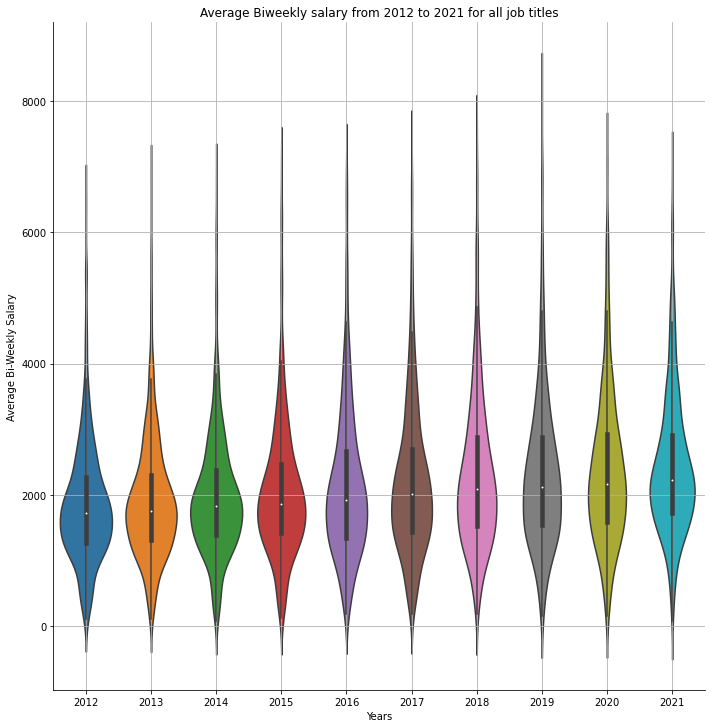

In [108]:
import seaborn as sns
sns.catplot('Year','Average Hourly_rate', data=updated_Table_PR, kind='violin',height=10)
plt.grid()
plt.title("Average Biweekly salary from 2012 to 2021 for all job titles")
plt.xlabel("Years")
plt.ylabel("Average Bi-Weekly Salary")

# Descriptive Statistic

In [109]:
updated_Table_PR_2021.describe()

,Average Hourly_rate,Year,CPI_AVG
count,690.000000,690.0,6.900000e+02
mean,2438.322386,2021.0,8.405350e+02
std,1070.707991,0.0,1.137693e-13
min,76.930000,2021.0,8.405350e+02
25%,1730.770020,2021.0,8.405350e+02
50%,2232.957413,2021.0,8.405350e+02
75%,2919.145081,2021.0,8.405350e+02
max,6953.850098,2021.0,8.405350e+02


In [110]:
updated_Table_PR_2020.describe()

,Average Hourly_rate,Year,CPI_AVG
count,735.000000,735.0,7.350000e+02
mean,2389.586227,2020.0,8.178820e+02
std,1176.124978,0.0,2.275285e-13
min,153.850006,2020.0,8.178820e+02
25%,1582.499619,2020.0,8.178820e+02
50%,2175.646688,2020.0,8.178820e+02
75%,2926.272583,2020.0,8.178820e+02
max,7191.959961,2020.0,8.178820e+02


In [111]:
updated_Table_PR_2019.describe()

,Average Hourly_rate,Year,CPI_AVG
count,740.000000,740.0,7.400000e+02
mean,2334.621874,2019.0,8.041340e+02
std,1184.396597,0.0,2.275275e-13
min,153.850006,2019.0,8.041340e+02
25%,1538.469971,2019.0,8.041340e+02
50%,2115.389893,2019.0,8.041340e+02
75%,2884.620117,2019.0,8.041340e+02
max,8100.000000,2019.0,8.041340e+02


In [112]:
updated_Table_PR_2018.describe()

,Average Hourly_rate,Year,CPI_AVG
count,762.000000,762.0,7.620000e+02
mean,2309.802497,2018.0,7.910570e+02
std,1176.457814,0.0,1.137615e-13
min,192.309998,2018.0,7.910570e+02
25%,1529.841278,2018.0,7.910570e+02
50%,2096.454956,2018.0,7.910570e+02
75%,2880.980103,2018.0,7.910570e+02
max,7467.109863,2018.0,7.910570e+02


In [113]:
updated_Table_PR_2017.describe()

,Average Hourly_rate,Year,CPI_AVG
count,787.000000,787.0,7.870000e+02
mean,2207.633878,2017.0,7.762560e+02
std,1146.331075,0.0,1.137591e-13
min,192.309998,2017.0,7.762560e+02
25%,1442.405029,2017.0,7.762560e+02
50%,2015.964966,2017.0,7.762560e+02
75%,2696.900024,2017.0,7.762560e+02
max,7249.620117,2017.0,7.762560e+02


In [114]:
updated_Table_PR_2016.describe()

,Average Hourly_rate,Year,CPI_AVG
count,790.000000,790.0,790.000
mean,2153.028213,2016.0,761.351
std,1154.987694,0.0,0.000
min,192.309998,2016.0,761.351
25%,1350.000000,2016.0,761.351
50%,1923.079956,2016.0,761.351
75%,2677.527527,2016.0,761.351
max,7038.470215,2016.0,761.351


In [115]:
updated_Table_PR_2015.describe()

,Average Hourly_rate,Year,CPI_AVG
count,768.000000,768.0,768.000
mean,2045.268321,2015.0,753.237
std,1039.263914,0.0,0.000
min,123.080002,2015.0,753.237
25%,1415.337509,2015.0,753.237
50%,1865.835022,2015.0,753.237
75%,2472.272461,2015.0,753.237
max,7051.540039,2015.0,753.237


In [116]:
updated_Table_PR_2014.describe()

,Average Hourly_rate,Year,CPI_AVG
count,747.000000,747.0,7.470000e+02
mean,1976.421032,2014.0,7.522880e+02
std,947.016423,0.0,2.275260e-13
min,76.930000,2014.0,7.522880e+02
25%,1384.619995,2014.0,7.522880e+02
50%,1837.800049,2014.0,7.522880e+02
75%,2376.929932,2014.0,7.522880e+02
max,6846.160156,2014.0,7.522880e+02


In [117]:
updated_Table_PR_2013.describe()

,Average Hourly_rate,Year,CPI_AVG
count,754.000000,754.0,754.000
mean,1930.645761,2013.0,742.469
std,939.264330,0.0,0.000
min,108.430000,2013.0,742.469
25%,1322.949951,2013.0,742.469
50%,1761.533227,2013.0,742.469
75%,2307.699951,2013.0,742.469
max,6832.700195,2013.0,742.469


In [118]:
updated_Table_PR_2012.describe()

,Average Hourly_rate,Year,CPI_AVG
count,738.000000,738.0,7.380000e+02
mean,1854.655272,2012.0,7.301980e+02
std,919.658073,0.0,1.137639e-13
min,108.430000,2012.0,7.301980e+02
25%,1269.239990,2012.0,7.301980e+02
50%,1730.770020,2012.0,7.301980e+02
75%,2269.541068,2012.0,7.301980e+02
max,6538.470215,2012.0,7.301980e+02


# Scatter Plot

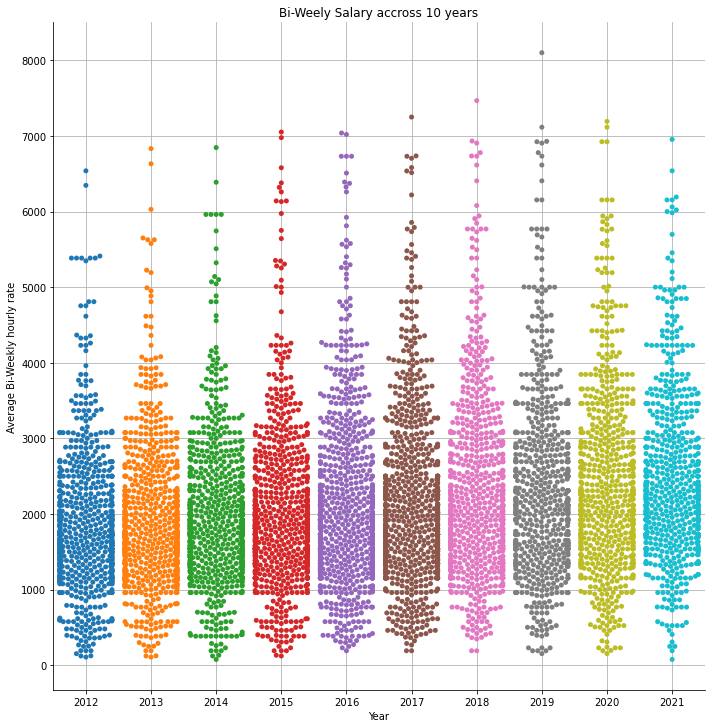

In [119]:
import seaborn as sns

sns.catplot('Year','Average Hourly_rate', data=updated_Table_PR, kind='swarm',height=10)
plt.ylabel("Average Bi-Weekly hourly rate")
plt.title("Bi-Weely Salary accross 10 years")
plt.grid()
plt.show()

In [120]:
#Selecting 9 job titles for analysis and saving it as CSV file (Top_title.csv)
cursor.execute('SELECT PR.Employee_title, AVG(PR.Hourly_rate),PR.check_date,Year(PR.check_date) FROM Payroll_report as PR INNER JOIN CONSUMER_PRICE_INDEX AS CP ON YEAR(PR.Pay_period_begin_date)=CP.YEAR GROUP by PR.Employee_title, Year(PR.check_date) order by Year(PR.check_date)' );
rows=cursor.fetchall()
df1=pd.DataFrame(rows, columns = ['Employee_title', 'Salary', 'Check_date','Year'])

In [121]:
title = ['ACCOUNT CLERK', 'DISTRICT OFFICE DIRECTOR', 'CHIEF OF STAFF', 'ACCOUNTS PAYABLE MANAGER', 'ADMINISTRATIVE ASSISTANT','SUPV SYSTEMS PROGRAMMING', 'SECRETARY OF THE SENATE', 'CHIEF FISCAL OFFICER']

In [122]:
df=pd.DataFrame()
for i in title:
    data = df1.loc[df1['Employee_title'] == i]
    df = df.append(data, ignore_index = True)
df.to_csv('Top_title.csv', header=True)

# Grouped Bar Graph

In [123]:
df=pd.read_csv('Top_title.csv')
df=pd.DataFrame(df)

df_2012 = df['Salary'].where(df['Year'] == 2012).dropna().tolist()
df_2013 = df['Salary'].where(df['Year'] == 2013).dropna().tolist()
df_2014 = df['Salary'].where(df['Year'] == 2014).dropna().tolist()
df_2015 = df['Salary'].where(df['Year'] == 2015).dropna().tolist()
df_2016 = df['Salary'].where(df['Year'] == 2016).dropna().tolist()
df_2017 = df['Salary'].where(df['Year'] == 2017).dropna().tolist()
df_2018 = df['Salary'].where(df['Year'] == 2018).dropna().tolist()
df_2019 = df['Salary'].where(df['Year'] == 2019).dropna().tolist()
df_2020 = df['Salary'].where(df['Year'] == 2020).dropna().tolist()
df_2021 = df['Salary'].where(df['Year'] == 2021).dropna().tolist()

index= df["Employee_title"].where(df['Year'] == 2016).dropna().tolist()

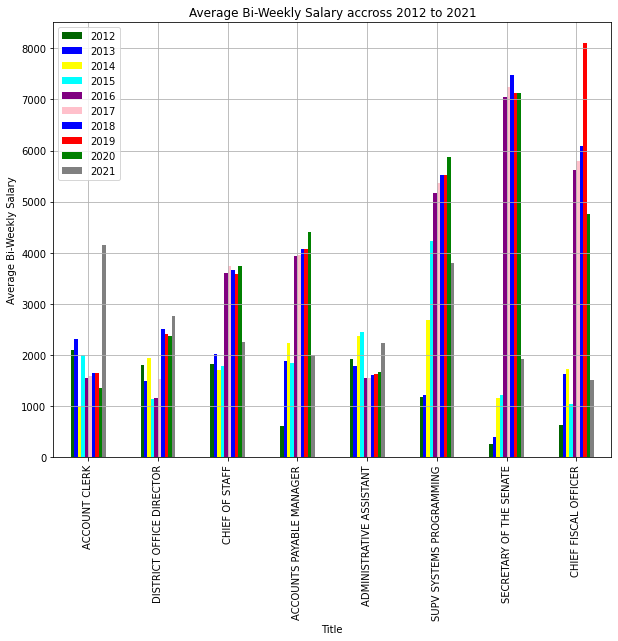

In [124]:
df_1 = pd.DataFrame({'2012':df_2012,'2013':df_2013,'2014':df_2014,'2015':df_2015,'2016':df_2016,'2017': df_2017,
                   '2018':df_2018,'2019':df_2019,'2020':df_2020,'2021':df_2021}, index=index)
ax = df_1.plot.bar(rot='vertical', color={"2021": "grey","2020": "green", "2019": "red","2018":"blue","2017":"pink",
                                        "2016":"purple","2015":"cyan","2014":"yellow","2013":"blue","2012":"darkgreen"})

fig = plt.gcf()
plt.grid()
plt.title("Average Bi-Weekly Salary accross 2012 to 2021")
plt.ylabel("Average Bi-Weekly Salary")
plt.xlabel("Title")
fig.set_size_inches(10, 8)

# Statistical Analysis

# Histogram

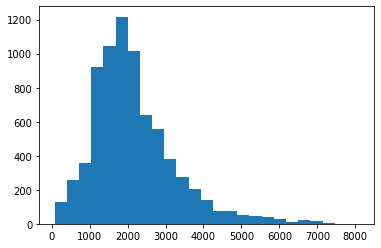

In [125]:
plt.hist(updated_Table_PR['Average Hourly_rate'],bins=25)
plt.show()

# Q-Q Plot

Text(0.5, 1.0, 'QQ Plot')

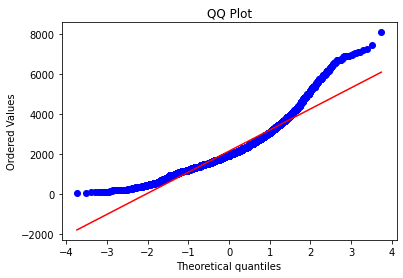

In [126]:
import pylab
import scipy.stats as stats

stats.probplot(updated_Table_PR['Average Hourly_rate'], dist="norm", plot=pylab)
pylab.title("QQ Plot")

# NORMALITY TEST

In [127]:
from scipy.stats import normaltest
stats, p = normaltest(updated_Table_PR['Average Hourly_rate'])
print("Stats",stats,"P-Value",p)
if p>0.05:
    print("Probably Gaussian")
else:
    print("Probably not Gaussian")


Stats 1708.8764277675657 P-Value 0.0
Probably not Gaussian


# Correlation between CPI and BiWeekly Salary

In [128]:
import scipy.stats
print(scipy.stats.kendalltau(updated_Table_PR['Average Hourly_rate'], updated_Table_PR['CPI_AVG'])) #tau

KendalltauResult(correlation=0.12900602675260614, pvalue=2.6712981061476164e-57)


# Time Series Forecasting

1. Moving Average
2. ARMA
3. ARIMA
4. SARIMA
5. Simple Expo Smoothing

In [129]:
df.head()

,Unnamed: 0,Employee_title,Salary,Check_date,Year
0,0,ACCOUNT CLERK,2098.029989,2012-12-19,2012
1,1,ACCOUNT CLERK,2307.696655,2013-12-18,2013
2,2,ACCOUNT CLERK,976.929993,2014-12-31,2014
3,3,ACCOUNT CLERK,2004.593343,2015-12-30,2015
4,4,ACCOUNT CLERK,1559.729980,2016-03-23,2016


# Reading file

In [130]:
def readfile(title):
    df1 = df.loc[df['Employee_title'] == title]
    col = ['Employee_title','Check_date','Unnamed: 0']
    df1.drop(col,axis=1, inplace=True)
    df1
    df1=df1.set_index(['Year'])
    train=df1[0:7] 
    test = df1[6:10]
    plt.plot(train['Salary'],color = 'blue',marker='o', label='Training Data')
    plt.plot(test['Salary'],color = 'orange',marker='o',label = 'Testing Data')
    plt.xlabel("Years")
    plt.ylabel("Salary")
    plt.legend()
    plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
    plt.title(title)
    plt.grid()
    plt.show()
    #print(df1)
    return train,test,df1

In [131]:
def moving_average(train,test,Error_dict):
    from statsmodels.tsa.arima.model import ARIMA
    model_ma = ARIMA(train, order=(0,0,2))
    model_fit_ma = model_ma.fit()
    yhat_ma = model_fit_ma.predict(len(test)-1,index=test.index)
    error_ma = np.sqrt(mean_squared_error(test.Salary, yhat_ma))
    print("Mean Square error for Moving Average is:",round(error_ma,3))
    Error_dict['Moving Average'] = round(error_ma,3)
    predicted_values['Moving Average'] = yhat_ma
    return Error_dict,yhat_ma,predicted_values

In [132]:
def ARMA_method(train,test,Error_dict):
    from statsmodels.tsa.arima.model import ARIMA
    model_arma = ARIMA(train, order=(2, 0, 2))
    model_fit_arma= model_arma.fit()
    yhat_arma = model_fit_arma.predict(len(test)-1,index=test.index)
    error_arma = np.sqrt(mean_squared_error(test.Salary, yhat_arma))
    print("Mean Square error for ARMA is:",round(error_arma,3))
    Error_dict['ARMA'] = round(error_arma,3)
    predicted_values['ARMA'] = yhat_arma
    return Error_dict,yhat_arma,predicted_values

In [133]:
# ADFULLER TEST
def stat_test(dataset):
    dftest = adfuller(dataset,autolag='AIC')
    print("1. ADF", dftest[0])
    print("2. P-Value", dftest[1])
    if dftest[1] <0.05:
        print("Values are stationarized")
    else:
        print("Values are not stationarized")
stat_test(train)

1. ADF -0.7757061726732221
2. P-Value 0.8261542546142158
Values are not stationarized


In [134]:
def ARIMA_method(train,test,Error_dict):
    from statsmodels.tsa.arima.model import ARIMA
    df1_model_arima = ARIMA(train,order = (0,0,1))
    df1_model_fit_arima = df1_model_arima.fit()
    yhat_arima = df1_model_fit_arima.predict(len(test)-1,index=test.index)
    error_arima = np.sqrt(mean_squared_error(test.Salary, yhat_arima))
    print("Mean Square error for ARIMA is:",round(error_arima,3))
    Error_dict['ARIMA'] = round(error_arima,3)
    predicted_values['ARIMA'] = yhat_arima
    return Error_dict,yhat_arima,predicted_values

In [135]:
def model_arima(train,test,Error_dict):
    modle_arima=auto_arima(train,start_p=0,d=1,start_q=0,max_p=5,max_d=5,max_q=5,start_P=0,D=0,start_Q=0, max_P=5,max_D=4,max_Q=5,m=12, seasonal=True,error_action='warn',trace=True,supress_warnings=True,stepwise=True,random_state=20,n_fits=50)
    model_arima.fit(train)
    yhat_arima = m.predict(n_preiods = 20)
    yhat_arima= yhat_arima[0:4]
    yhat_arima = pd.DataFrame(yhat_arima,index =test.index )
    print("Mean Square error for Moving Average is:",np.sqrt(mean_squared_error(test.Salary, yhat_arima)))

In [136]:
def SERIMA_method(train,test,Error_dict):
    model_sm = SARIMAX(train, order=(0,1,0), seasonal_order=(0, 1, 0, 12))
    model_fit_sm = model_sm.fit(disp=False)
    yhat_sm = model_fit_sm.predict(len(test)-1,index=test.index)
    error_sm = np.sqrt(mean_squared_error(test.Salary, yhat_sm))
    print("Mean Square error for SERIMA is:",round(error_sm,3))
    Error_dict['SERIMA'] = round(error_sm,3)
    predicted_values['SERIMA'] = yhat_sm
    return Error_dict,yhat_sm,predicted_values

In [137]:
def Simple_Exp_Smoothing(train,test,Error_dict):
    model_ses = SimpleExpSmoothing(train)
    model_fit_ses = model_ses.fit()
    yhat_ses = model_fit_ses.predict(len(test)-1)
    error_ses = np.sqrt(mean_squared_error(test.Salary, yhat_ses))
    print("Mean Square error for Simple Exponential Smooting is:",round(error_ses,3))
    Error_dict['Simple Expo Smooting'] = round(error_ses,3)
    predicted_values['Simple Expo Smooting'] = yhat_ses
    return Error_dict,yhat_ses,predicted_values

In [138]:
def visual (train,test,yhat_ma,yhat_arma,yhat_arima,yhat_sm,yhat_ses):
    
    train_li = train['Salary'].tolist()
    ke_train = {'2012':train_li[0],'2013':train_li[1],'2014':train_li[2],'2015':train_li[3],'2016':train_li[4],'2017':train_li[5],'2018':train_li[6]}
    
    test_li = test['Salary'].tolist()
    ke_test = {'2018':test_li[0],'2019':test_li[1],'2020':test_li[2],'2021':test_li[3]}
    
    yhat_ma_li = yhat_ma.tolist() 
    ke_ma={'2018':yhat_ma_li[0],'2019':yhat_ma_li[1],'2020':yhat_ma_li[2],'2021':yhat_ma_li[3]}

    yhat_arma_li = yhat_arma.tolist() 
    ke_arma={'2018':yhat_arma_li[0],'2019':yhat_arma_li[1],'2020':yhat_arma_li[2],'2021':yhat_arma_li[3]}
    
    yhat_arima_li = yhat_arima.tolist() 
    ke_arima={'2018':yhat_arima_li[0],'2019':yhat_arima_li[1],'2020':yhat_arima_li[2],'2021':yhat_arima_li[3]}
    
    yhat_sm_li = yhat_sm.tolist() 
    ke_sm={'2018':yhat_sm_li[0],'2019':yhat_sm_li[1],'2020':yhat_sm_li[2],'2021':yhat_sm_li[3]}
    
    yhat_ses_li = yhat_ses.tolist()
    ke={'2018':yhat_ses_li[0],'2019':yhat_ses_li[1],'2020':yhat_ses_li[2],'2021':yhat_ses_li[3]}
    

    figure(figsize=(8, 6), dpi=80)
    plt.plot(ke_train.keys(),ke_train.values(), label = 'Training value', color = 'red',marker='o')
    plt.plot(ke_test.keys(),ke_test.values(), label = 'Test Value', color = 'blue',marker='o')
    plt.plot(ke_ma.keys(),ke_ma.values(),'r--', label = 'Moving Average', color = 'Yellow',marker='x')
    plt.plot(ke_arma.keys(),ke_arma.values(),'r--', label = 'ARMA', color = 'Black',marker='x')
    plt.plot(ke_arima.keys(),ke_arima.values(),'r--', label = 'ARIMA', color='Purple',marker='x')
    plt.plot(ke_sm.keys(),ke_sm.values(),'r--', label= 'SERIMA', COLOR ='Green',marker='x')
    plt.plot(ke.keys(),ke.values(),'r--',label= 'SimpleExpSmoothing ', COLOR ='pink',marker='x')

    plt.title("Plot prediction using different methods")
    plt.legend()
    plt.xlabel("Year")
    plt.ylabel("Average Biweekly Salary")
    plt.xticks(rotation = 45)
    plt.grid()
    plt.ylim(1000,2500)
    plt.show()

In [100]:
best_approach = {}
title_approach = {}
predicted_values = {}
Error_dict = {'Moving Average':0, 'ARMA': 0 , 'ARIMA':0, 'SERIMA':0, 'Simple Expo Smooting':0}
title = ['ACCOUNT CLERK', 'DISTRICT OFFICE DIRECTOR', 'CHIEF OF STAFF', 'ACCOUNTS PAYABLE MANAGER', 'ADMINISTRATIVE ASSISTANT','SUPV SYSTEMS PROGRAMMING', 'SECRETARY OF THE SENATE', 'CHIEF FISCAL OFFICER']

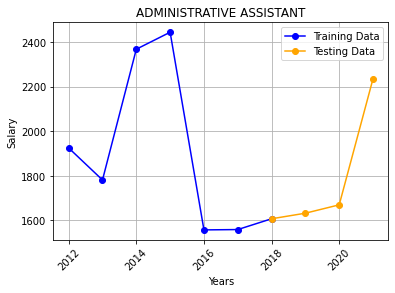

Mean Square error for Moving Average is: 236.101
Mean Square error for ARMA is: 311.949
Mean Square error for ARIMA is: 424.339
Mean Square error for SERIMA is: 652.968
Mean Square error for Simple Exponential Smooting is: 296.575


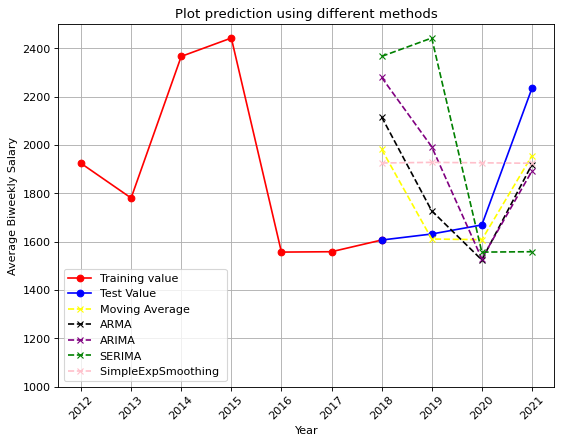

In [89]:
train,test,df1=readfile('ADMINISTRATIVE ASSISTANT')
Error_dict,yhat_ma,predicted_values = moving_average(train,test,Error_dict)
Error_dict,yhat_arma,predicted_values = ARMA_method(train,test,Error_dict)
Error_dict,yhat_arima,predicted_values = ARIMA_method(train,test,Error_dict)
Error_dict,yhat_sm,predicted_values = SERIMA_method(train,test,Error_dict)
Error_dict,yhat_ses,predicted_values = Simple_Exp_Smoothing(train,test,Error_dict)
visual(train,test,yhat_ma,yhat_arma,yhat_arima,yhat_sm,yhat_ses)

Prediction for job Title is: ACCOUNT CLERK


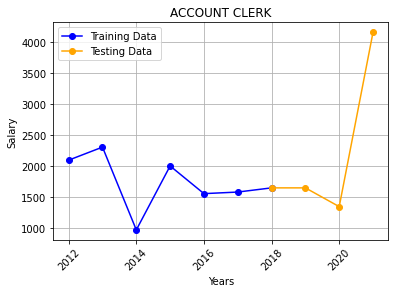

Mean Square error for Moving Average is: 1182.129
Mean Square error for ARMA is: 1155.225
Mean Square error for ARIMA is: 1186.982
Mean Square error for SERIMA is: 1343.674
Mean Square error for Simple Exponential Smooting is: 1233.843
Best model to predict salary is: ARMA 1155.225


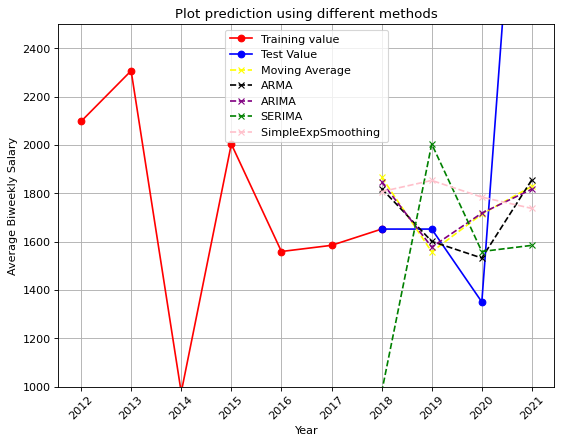

Prediction for job Title is: DISTRICT OFFICE DIRECTOR


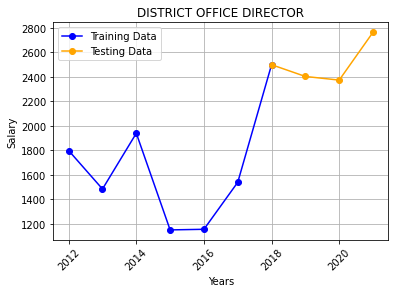

Mean Square error for Moving Average is: 825.501
Mean Square error for ARMA is: 922.236
Mean Square error for ARIMA is: 862.464
Mean Square error for SERIMA is: 1105.015
Mean Square error for Simple Exponential Smooting is: 873.517
Best model to predict salary is: Moving Average 825.501


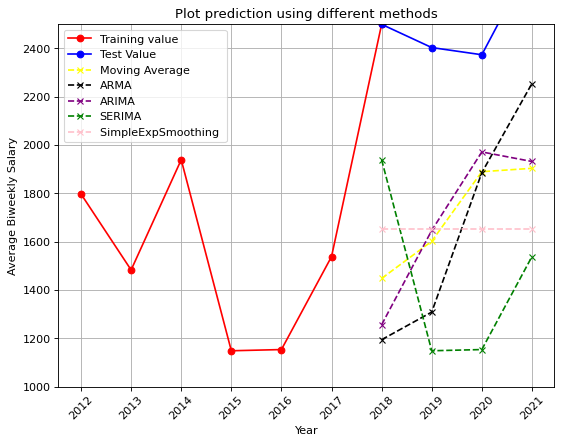

Prediction for job Title is: CHIEF OF STAFF


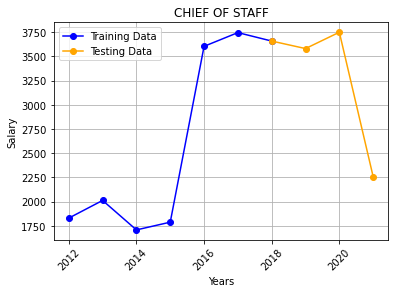

Mean Square error for Moving Average is: 1139.384
Mean Square error for ARMA is: 912.759
Mean Square error for ARIMA is: 1022.43
Mean Square error for SERIMA is: 1521.678
Mean Square error for Simple Exponential Smooting is: 1521.347
Best model to predict salary is: ARMA 912.759


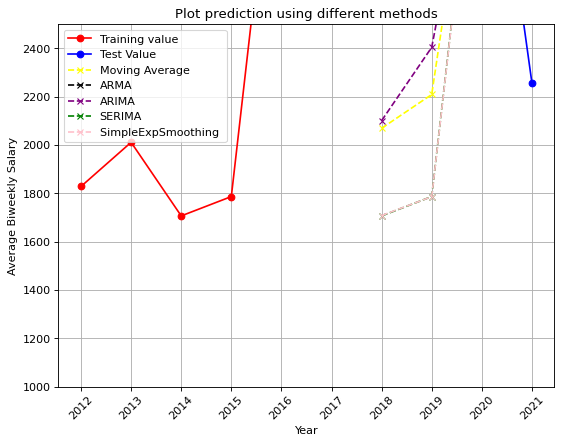

Prediction for job Title is: ACCOUNTS PAYABLE MANAGER


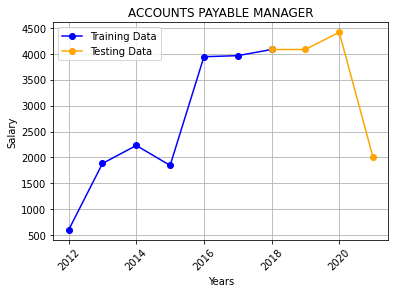

Mean Square error for Moving Average is: 1459.9
Mean Square error for ARMA is: 1555.584
Mean Square error for ARIMA is: 1355.494
Mean Square error for SERIMA is: 1766.578
Mean Square error for Simple Exponential Smooting is: 1775.341
Best model to predict salary is: ARIMA 1355.494


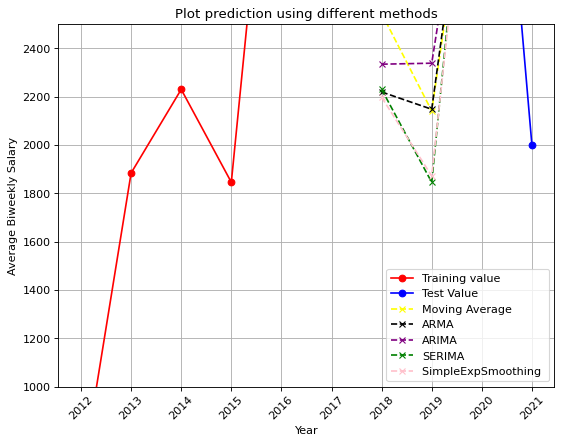

Prediction for job Title is: ADMINISTRATIVE ASSISTANT


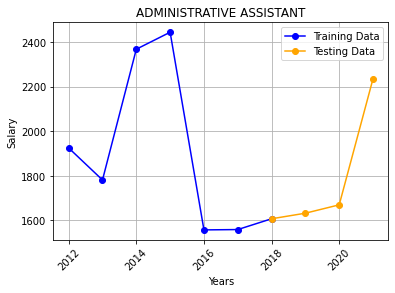

Mean Square error for Moving Average is: 236.101
Mean Square error for ARMA is: 311.949
Mean Square error for ARIMA is: 424.339
Mean Square error for SERIMA is: 652.968
Mean Square error for Simple Exponential Smooting is: 296.575
Best model to predict salary is: Moving Average 236.101


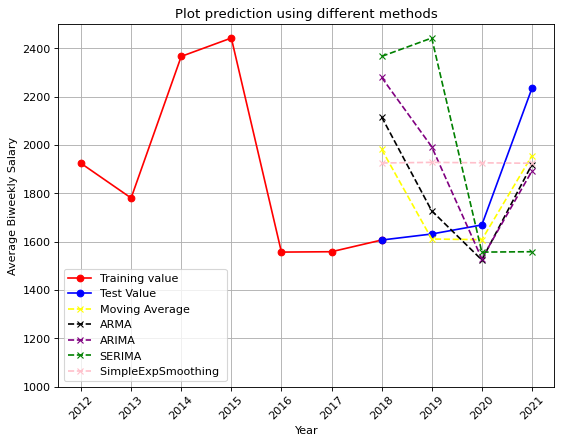

Prediction for job Title is: SUPV SYSTEMS PROGRAMMING


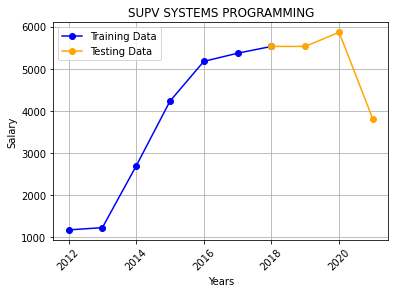

Mean Square error for Moving Average is: 1202.547
Mean Square error for ARMA is: 1259.933
Mean Square error for ARIMA is: 1430.328
Mean Square error for SERIMA is: 1779.325
Mean Square error for Simple Exponential Smooting is: 1779.325
Best model to predict salary is: Moving Average 1202.547


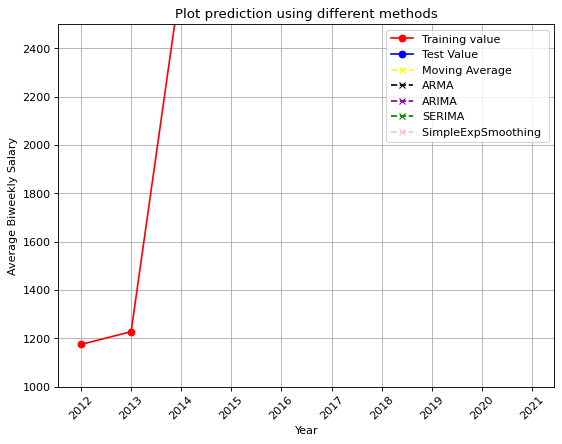

Prediction for job Title is: SECRETARY OF THE SENATE


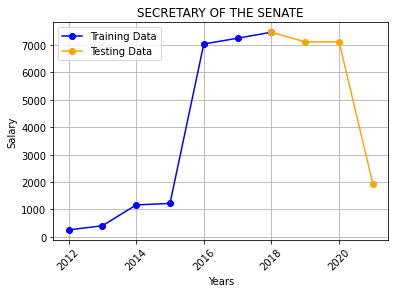

Mean Square error for Moving Average is: 4304.389
Mean Square error for ARMA is: 3402.804
Mean Square error for ARIMA is: 3478.047
Mean Square error for SERIMA is: 5070.367
Mean Square error for Simple Exponential Smooting is: 5071.452
Best model to predict salary is: ARMA 3402.804


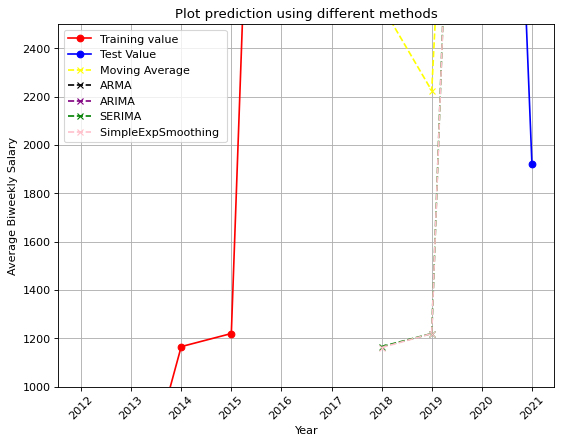

Prediction for job Title is: CHIEF FISCAL OFFICER


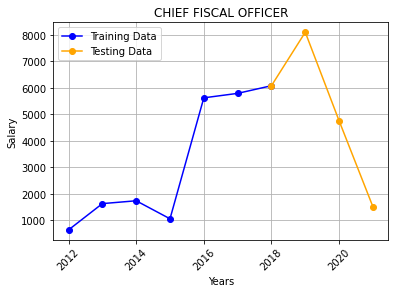

Mean Square error for Moving Average is: 3913.941
Mean Square error for ARMA is: 3343.532
Mean Square error for ARIMA is: 3508.381
Mean Square error for SERIMA is: 4682.564
Mean Square error for Simple Exponential Smooting is: 4636.539
Best model to predict salary is: ARMA 3343.532


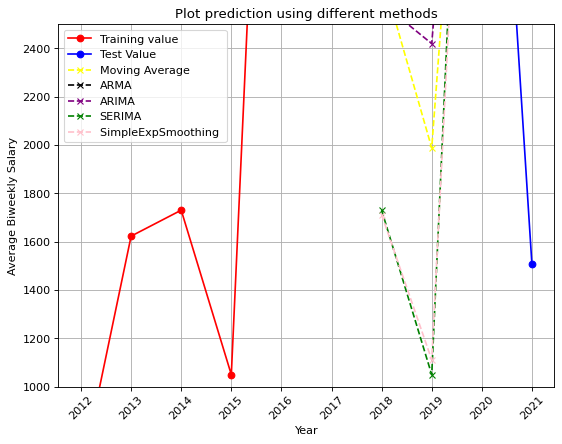

In [102]:
#Predicting for all job titles
for i in title:
    print("Prediction for job Title is:",i)
    Error_dict = {'Moving Average':0, 'ARMA': 0 , 'ARIMA':0, 'SERIMA':0, 'Simple Expo Smooting':0}
    train,test,df1=readfile(i)
    Error_dict,yhat_ma,predicted_values = moving_average(train,test,Error_dict)
    #print(yhat_ma)
    Error_dict,yhat_arma,predicted_values = ARMA_method(train,test,Error_dict)
    #print(yhat_arma)
    Error_dict,yhat_arima,predicted_values = ARIMA_method(train,test,Error_dict)
    Error_dict,yhat_sm,predicted_values = SERIMA_method(train,test,Error_dict)
    Error_dict,yhat_ses,predicted_values = Simple_Exp_Smoothing(train,test,Error_dict)
    val=min(Error_dict.values())
    for a,b in Error_dict.items():
        if val == b:
            bestapproach = a
    #print(bestapproach)
    pred = []
    for x,y in predicted_values.items():
        if x == bestapproach:
            pred.append(y)
    #print('Predicted values are',pred)
    for k,v in Error_dict.items():
        if val == v:
            best_approach[i] = k
            print("Best model to predict salary is:",k,v)
            break
    title_approach[i] = Error_dict
    
    visual(train,test,yhat_ma,yhat_arma,yhat_arima,yhat_sm,yhat_ses)
    

In [139]:
print(title_approach)

{'ACCOUNT CLERK': {'Moving Average': 1182.129, 'ARMA': 1155.225, 'ARIMA': 1186.982, 'SERIMA': 1343.674, 'Simple Expo Smooting': 1233.843}, 'DISTRICT OFFICE DIRECTOR': {'Moving Average': 825.501, 'ARMA': 922.236, 'ARIMA': 862.464, 'SERIMA': 1105.015, 'Simple Expo Smooting': 873.517}, 'CHIEF OF STAFF': {'Moving Average': 1139.384, 'ARMA': 912.759, 'ARIMA': 1022.43, 'SERIMA': 1521.678, 'Simple Expo Smooting': 1521.347}, 'ACCOUNTS PAYABLE MANAGER': {'Moving Average': 1459.9, 'ARMA': 1555.584, 'ARIMA': 1355.494, 'SERIMA': 1766.578, 'Simple Expo Smooting': 1775.341}, 'ADMINISTRATIVE ASSISTANT': {'Moving Average': 236.101, 'ARMA': 311.949, 'ARIMA': 424.339, 'SERIMA': 652.968, 'Simple Expo Smooting': 296.575}, 'SUPV SYSTEMS PROGRAMMING': {'Moving Average': 1202.547, 'ARMA': 1259.933, 'ARIMA': 1430.328, 'SERIMA': 1779.325, 'Simple Expo Smooting': 1779.325}, 'SECRETARY OF THE SENATE': {'Moving Average': 4304.389, 'ARMA': 3402.804, 'ARIMA': 3478.047, 'SERIMA': 5070.367, 'Simple Expo Smooting': 50

# Predicting future salaries

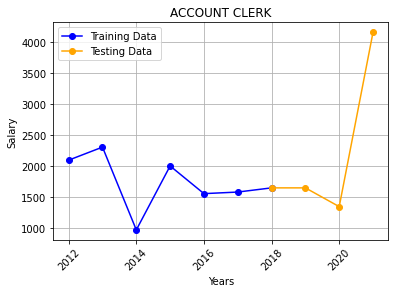

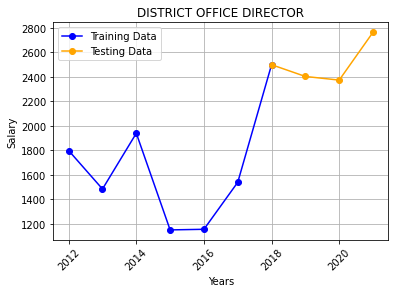

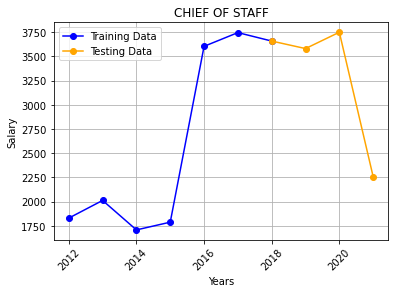

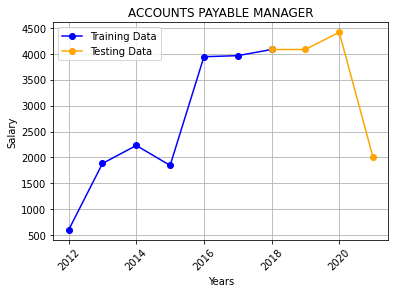

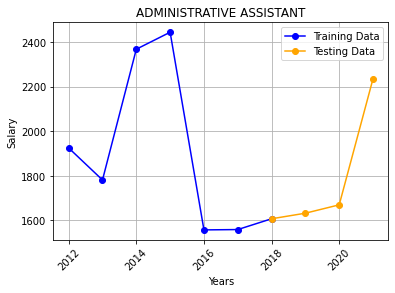

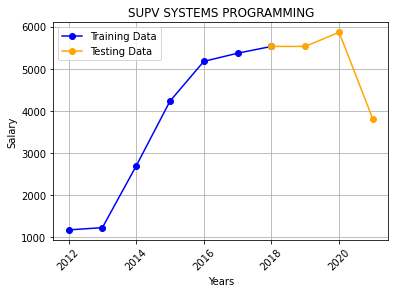

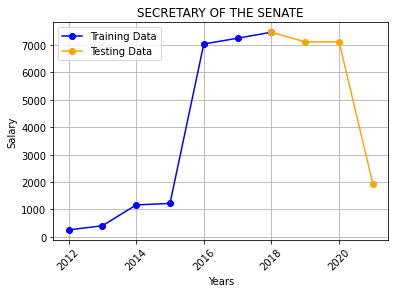

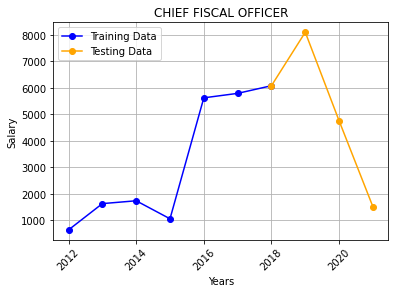

[{'2022': 1887.4496163972633,
  '2023': 2057.8659141584167,
  '2024': 2066.0715865590896,
  '2025': 1952.5642503233728,
  '2026': 1879.2060989729998,
  '2027': 2314.2418759954207},
 {'2022': 1480.1391561790606,
  '2023': 592.8635511714131,
  '2024': 2288.7452641576447,
  '2025': 2295.955718617707,
  '2026': 2774.9765607945683,
  '2027': 1841.5766130588693},
 {'2022': 1726.1255143095582,
  '2023': 4215.553316619383,
  '2024': 3625.865195753381,
  '2025': 3332.5129538741685,
  '2026': 3871.446489091514,
  '2027': 3339.736534591367},
 {'2022': 2806.294051625599,
  '2023': 2996.691461495372,
  '2024': 4138.642707544104,
  '2025': 4547.330726239859,
  '2026': 3960.608772043125,
  '2027': 3511.381876761422},
 {'2022': 1536.6431604459533,
  '2023': 1381.887950161441,
  '2024': 1878.779252466702,
  '2025': 1782.0181934714128,
  '2026': 2111.0568390213475,
  '2027': 2019.1422149463517},
 {'2022': 5763.77618539434,
  '2023': 6012.596642779206,
  '2024': 5500.352969086233,
  '2025': 5281.94767852

In [141]:
predicted_Vals = []
for i in title:
    train_CS,test_CS,df1_CS=readfile(i)
    model_arma = ARIMA(df1_CS, order=(2, 0, 2))
    model_fit_arma= model_arma.fit()
    yhat_arma = model_fit_arma.predict(len(test))
    yhat_arma = yhat_arma.tolist()
    CS_Predicted = {'2022':yhat_arma[0],'2023':yhat_arma[1],'2024':yhat_arma[2],'2025':yhat_arma[3],'2026':yhat_arma[4],'2027':yhat_arma[5]}
    predicted_Vals.append(CS_Predicted)
predicted_Vals

# Grouped bar for predicted values

In [155]:
df_2022,df_2023,df_2024,df_2025,df_2026,df_2027 = [],[],[],[],[],[]
for i in range(len(predicted_Vals)):
    for k,v in predicted_Vals[i].items():
        if k == '2022':
            df_2022.append(v)
        if k == '2023':
            df_2023.append(v)
        if k == '2024':
            df_2024.append(v)
        if k == '2025':
            df_2025.append(v)
        if k == '2026':
            df_2026.append(v)

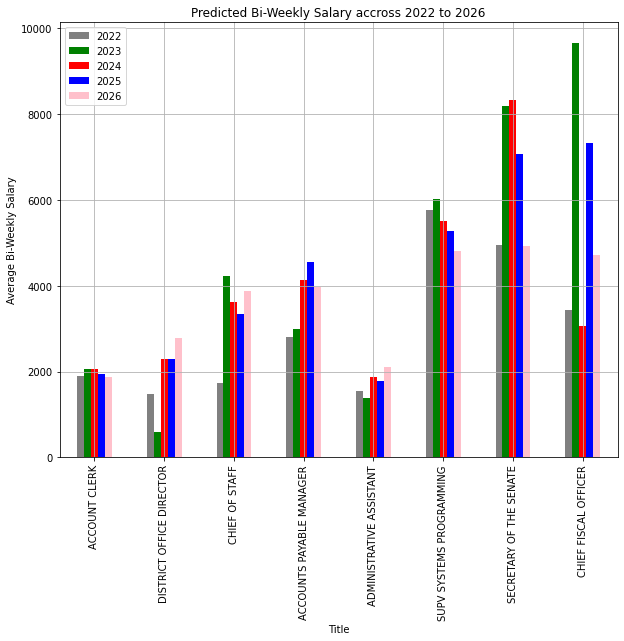

In [159]:
df = pd.DataFrame({'2022':df_2022,'2023':df_2023,'2024':df_2024,'2025':df_2025,'2026':df_2026},title)
ax = df.plot.bar(rot='vertical', color={"2022": "grey","2023": "green", "2024": "red","2025":"blue","2026":"pink"})

fig = plt.gcf()
plt.grid()
#plt.xticks(title,x)
plt.title("Predicted Bi-Weekly Salary accross 2022 to 2026")
plt.ylabel("Average Bi-Weekly Salary")
plt.xlabel("Title")
fig.set_size_inches(10, 8)